In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:


# Load the datasets
ratings = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/recsys/data/ratings.csv')
movies = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/recsys/data/movies.csv')

# Display the first few rows of each DataFrame
print("Ratings DataFrame:")
display(ratings.head())

print("Movies DataFrame:")
display(movies.head())

# Check for missing values
print("Missing values in ratings:")
print(ratings.isnull().sum())

print("Missing values in movies:")
print(movies.isnull().sum())

# Check for duplicates
print("Duplicate rows in ratings:")
print(ratings.duplicated().sum())

print("Duplicate rows in movies:")
print(movies.duplicated().sum())

# Basic statistics and distributions
print("Ratings statistics:")
display(ratings.describe())

print("Movies statistics:")
display(movies.describe())






Ratings DataFrame:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Movies DataFrame:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Missing values in movies:
movieId    0
title      0
genres     0
dtype: int64
Duplicate rows in ratings:
0
Duplicate rows in movies:
0
Ratings statistics:


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Movies statistics:


,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


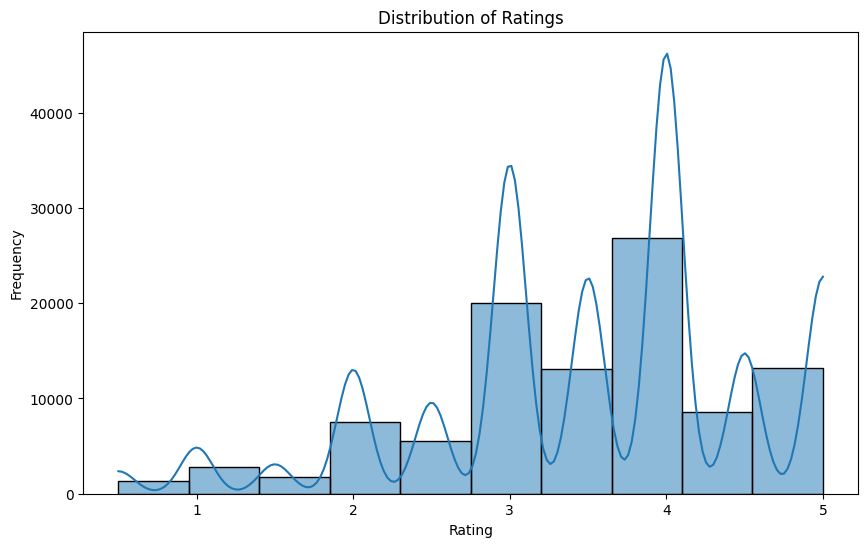

In [3]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Ensure the correct data types
print("Ratings DataFrame types:")
print(ratings.dtypes)

print("Movies DataFrame types:")
print(movies.dtypes)


Ratings DataFrame types:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
Movies DataFrame types:
movieId     int64
title      object
genres     object
dtype: object


In [5]:
# Validate rating values
print("Unique rating values:")
print(ratings['rating'].unique())

Unique rating values:
[4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


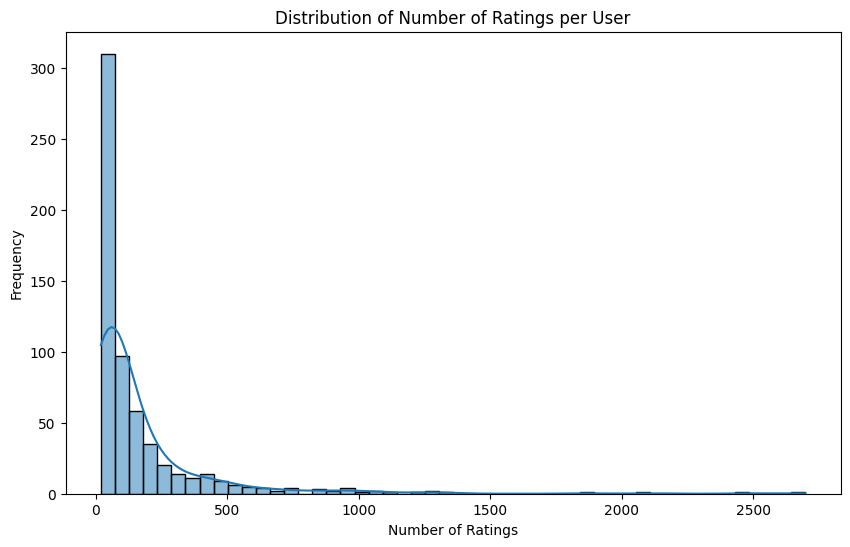

In [6]:
# Number of ratings per user
ratings_per_user = ratings.groupby('userId').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Merge the datasets on 'movieId'
merged_data = pd.merge(ratings, movies, on='movieId')

# Display the first few rows of the merged DataFrame
print("Merged DataFrame:")
display(merged_data.head(20))

Merged DataFrame:


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [8]:
# Check for missing values
print("Missing values in merged DataFrame:")
print(merged_data.isnull().sum())

# Check for duplicates
print("Duplicate rows in merged DataFrame:")
print(merged_data.duplicated().sum())

Missing values in merged DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64
Duplicate rows in merged DataFrame:
0


C:\Users\sanja\AppData\Local\Temp\ipykernel_11908\839340051.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_df['count'], y=genre_counts_df['genre'], palette='viridis')


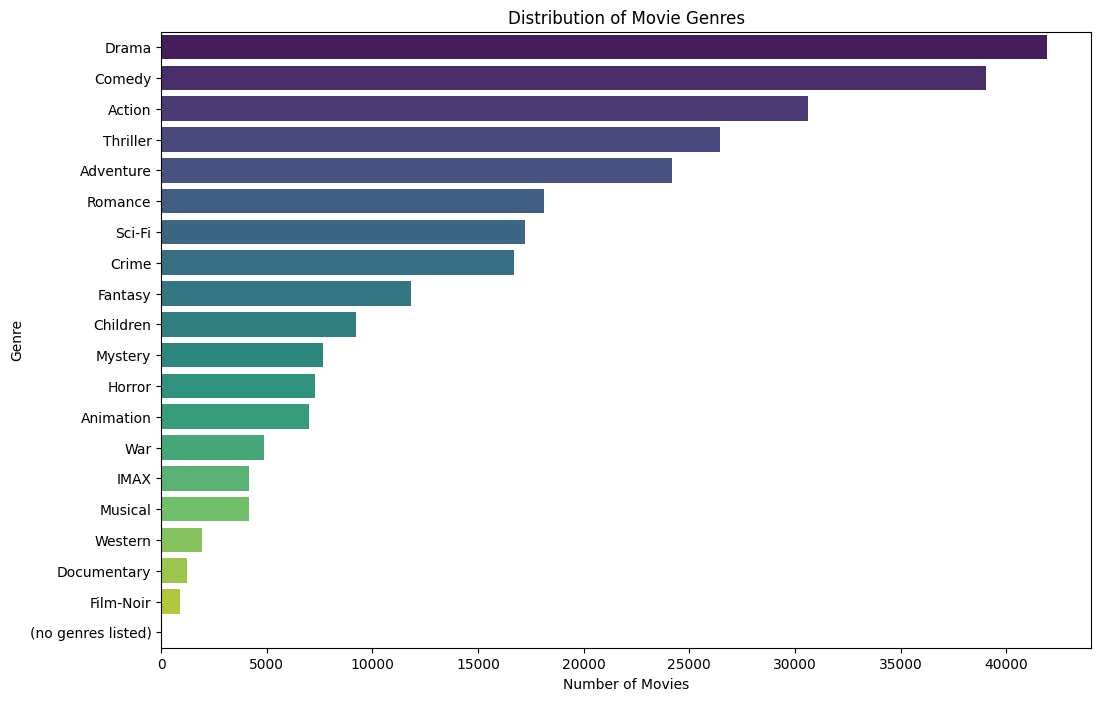

In [9]:
# Split genres and count their occurrences
from collections import Counter

all_genres = merged_data['genres'].str.split('|').explode()
genre_counts = Counter(all_genres)

# Convert to DataFrame
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).reset_index()
genre_counts_df = genre_counts_df.rename(columns={'index': 'genre'}).sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts_df['count'], y=genre_counts_df['genre'], palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


C:\Users\sanja\AppData\Local\Temp\ipykernel_11908\289320561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_per_genre.values, y=average_ratings_per_genre.index, palette='viridis')


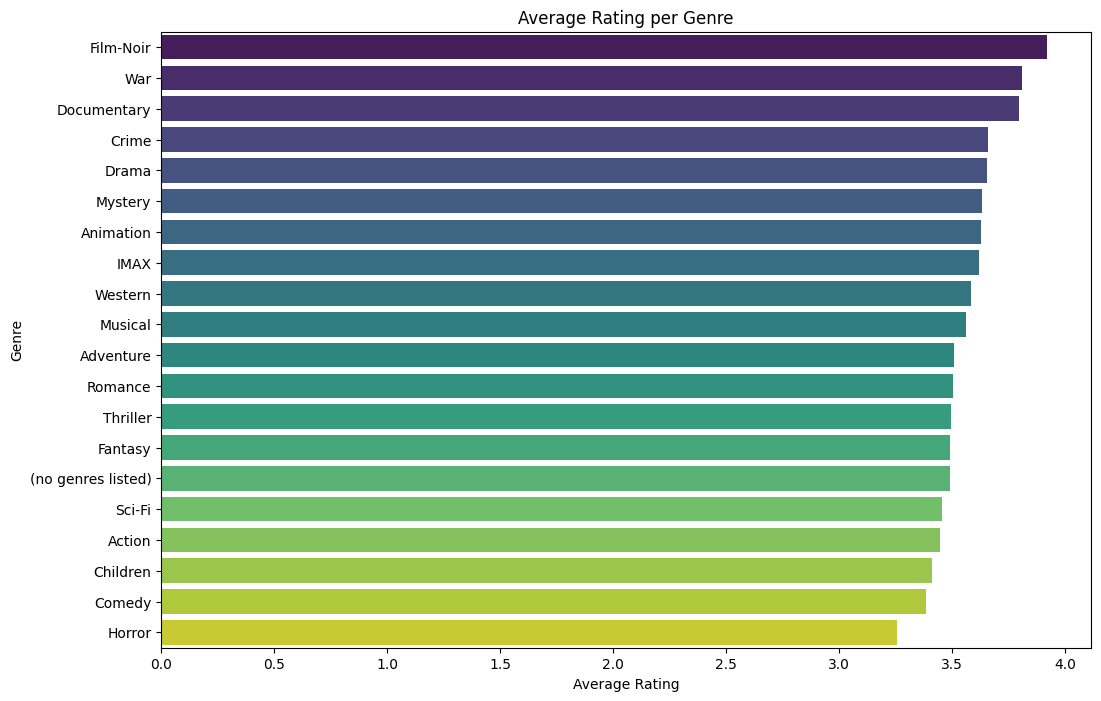

In [10]:
# Calculate average rating per genre
genre_ratings = merged_data.copy()
genre_ratings['genres'] = genre_ratings['genres'].str.split('|')
genre_ratings = genre_ratings.explode('genres')
average_ratings_per_genre = genre_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_ratings_per_genre.values, y=average_ratings_per_genre.index, palette='viridis')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


In [11]:
# Filter high ratings (e.g., ratings of 4 and 5)
high_ratings = merged_data[merged_data['rating'] >= 4.0]

# Split genres and explode them into separate rows
high_ratings_genres = high_ratings.copy()
high_ratings_genres['genres'] = high_ratings_genres['genres'].str.split('|')
high_ratings_genres = high_ratings_genres.explode('genres')

# Display the first few rows
print("High Ratings with Genres:")
display(high_ratings_genres.head())

High Ratings with Genres:


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure
0,1,1,4.0,964982703,Toy Story (1995),Animation
0,1,1,4.0,964982703,Toy Story (1995),Children
0,1,1,4.0,964982703,Toy Story (1995),Comedy
0,1,1,4.0,964982703,Toy Story (1995),Fantasy


In [12]:
# User ID for which to recommend movies
user_id = 1

# Filter data for the specified user
user_high_ratings_genres = high_ratings_genres[high_ratings_genres['userId'] == user_id]

# Calculate the mean rating for each genre
user_genre_preferences = user_high_ratings_genres.groupby('genres')['rating'].mean().sort_values(ascending=False)
print("User's Genre Preferences:")
print(user_genre_preferences)


User's Genre Preferences:
genres
Film-Noir    5.000000
Musical      4.850000
Mystery      4.846154
Animation    4.814815
Children     4.756757
Drama        4.656250
War          4.650000
Crime        4.615385
Adventure    4.608108
Thriller     4.581395
Action       4.578947
Comedy       4.542857
Fantasy      4.536585
Sci-Fi       4.531250
Western      4.500000
Romance      4.416667
Horror       4.333333
Name: rating, dtype: float64


In [13]:
# Get the list of movies the user has already rated
rated_movies = merged_data[merged_data['userId'] == user_id]['movieId'].tolist()

# Filter out these movies from the recommendations
unrated_movies = merged_data[~merged_data['movieId'].isin(rated_movies)]

# Get movies from user's preferred genres
preferred_genres = user_genre_preferences.index.tolist()
recommended_movies = unrated_movies[unrated_movies['genres'].str.contains('|'.join(preferred_genres))]

# Sort by average rating or another criteria
recommended_movies = recommended_movies.groupby('title').agg({'rating': 'mean', 'genres': 'first'}).sort_values(by='rating', ascending=False).reset_index()

# Display the top recommended movies
print("Top Recommended Movies:")
display(recommended_movies.head(10))


Top Recommended Movies:


,title,rating,genres
0,The Eye: Infinity (2005),5.0,Horror
1,Ghost Graduation (2012),5.0,Comedy
2,Dylan Moran: Monster (2004),5.0,Comedy|Documentary
3,Presto (2008),5.0,Animation|Children|Comedy|Fantasy
4,Mickey's Once Upon a Christmas (1999),5.0,Animation|Comedy|Fantasy
5,Winnie Pooh (1969),5.0,Animation|Children
6,Winnie the Pooh Goes Visiting (1971),5.0,Animation
7,Trailer Park Boys (1999),5.0,Comedy|Crime
8,Winnie the Pooh and the Day of Concern (1972),5.0,Animation
9,Seems Like Old Times (1980),5.0,Comedy|Romance


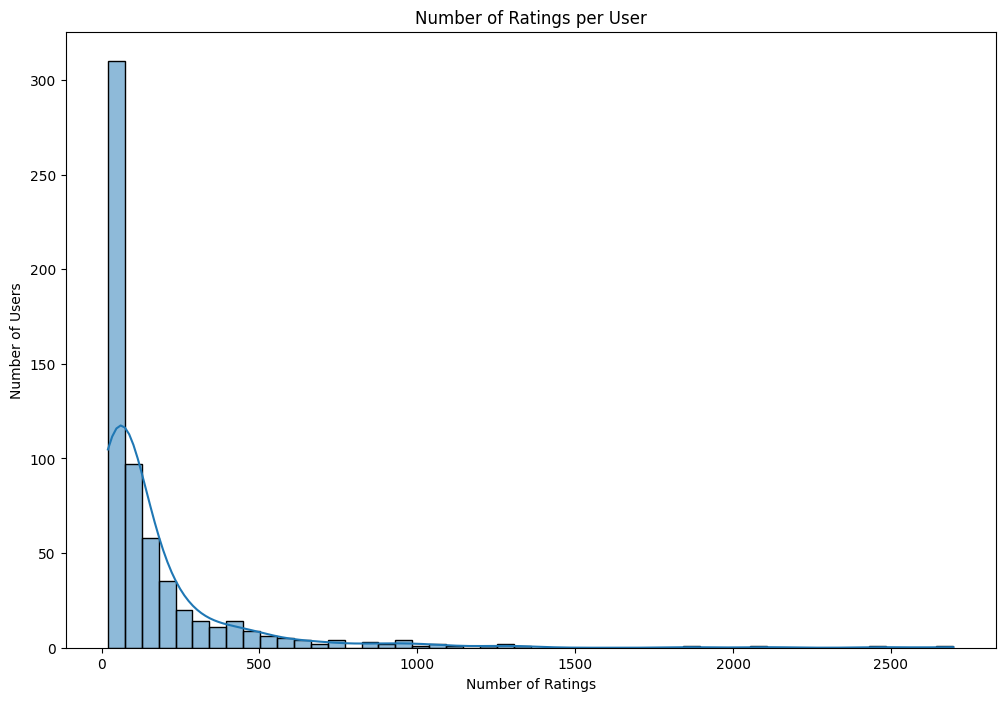

Statistics of Ratings per User:
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: count, dtype: float64


In [14]:
# Number of ratings per user
ratings_per_user = ratings['userId'].value_counts()

plt.figure(figsize=(12, 8))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

# Display basic statistics about the number of ratings per user
print("Statistics of Ratings per User:")
print(ratings_per_user.describe())


using xlim and ylim to zoom in

In [15]:
ratings_per_movie = ratings.groupby('movieId').size()
# print(type(ratings_per_movie))
ratings_per_movie.sort_values(ascending=False).head(30)

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
2959    218
1       215
1196    211
50      204
2858    204
47      203
780     202
150     201
1198    200
4993    198
1210    196
858     192
457     190
592     189
5952    188
2028    188
7153    185
588     183
608     181
2762    179
dtype: int64

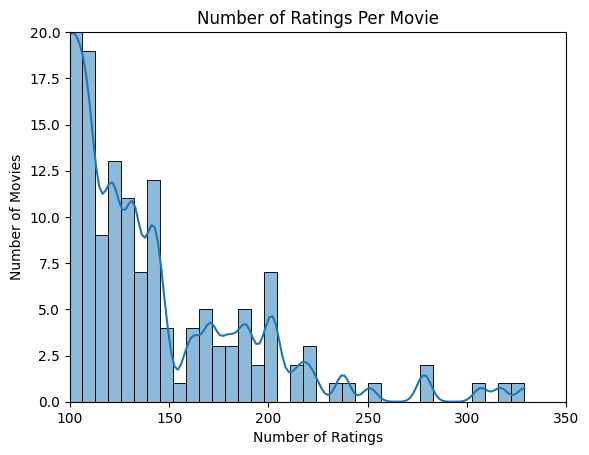

In [16]:
ratings_per_movie = ratings.groupby('movieId').size()
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.xlim(100, 350)
plt.ylim(0, 20)
plt.title('Number of Ratings Per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

In [17]:
# Check for duplicate titles
duplicate_titles = movies[movies.duplicated(subset='title', keep=False)]

# Display the duplicate titles
print("Duplicate Titles:")
duplicate_titles_sorted = duplicate_titles.sort_values(by='title')
duplicate_titles_sorted


Duplicate Titles:


,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [3]:
ratings = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/recsys/data/rating1.csv')

In [6]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


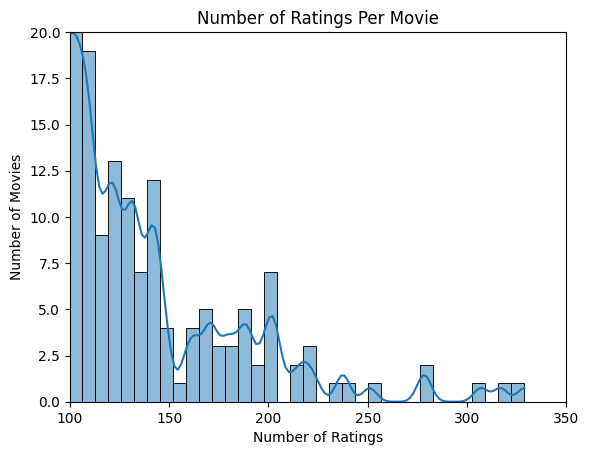

In [7]:
ratings_per_movie = ratings.groupby('movieId').size()
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.xlim(100, 350)
plt.ylim(0, 20)
plt.title('Number of Ratings Per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()